# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,B,-0.868753
1,0.000628,A,6.575517
2,0.001257,A,6.704877
3,0.001885,A,7.197780
4,0.002514,B,4.945703


<Axes: title={'center': 'x1 vs y'}, xlabel='X1', ylabel='y'>

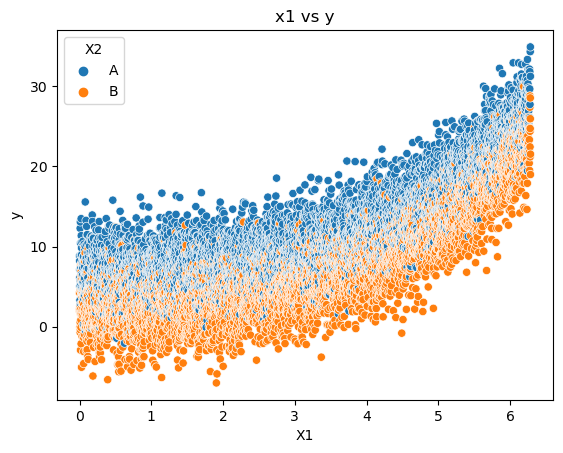

In [4]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: xlabel='X1', ylabel='y'>

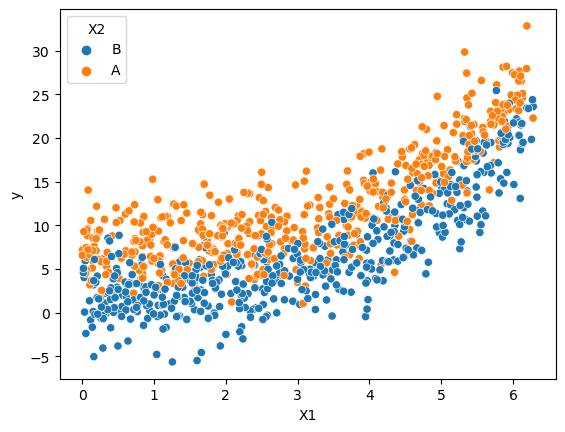

In [4]:
# todo: add the same title as above

sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 
explain findings in the graphs

In [5]:
X = df[['X1', 'X2']]
y = df.y

In [6]:
X.head()

,X1,X2
0,0.000000,B
1,0.000628,A
2,0.001257,A
3,0.001885,A
4,0.002514,B


In [7]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5817882496784863

In [8]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5817882496784863

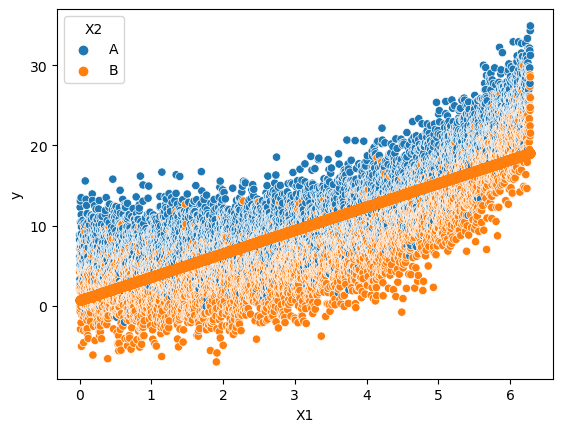

In [11]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X.X1, y) 
# plt.scatter(X.X1, y_pred)

# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

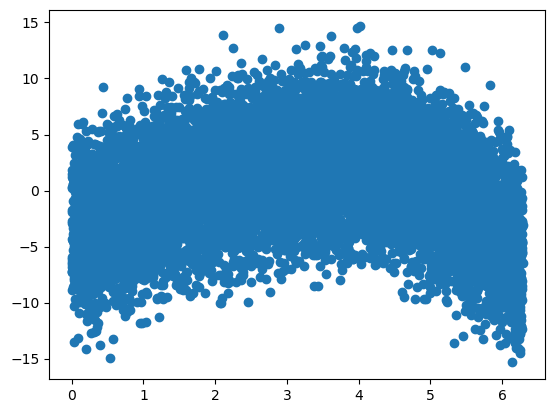

In [9]:
# todo: add a proper title

plt.scatter(X.X1, y_pred-y)

<Axes: >

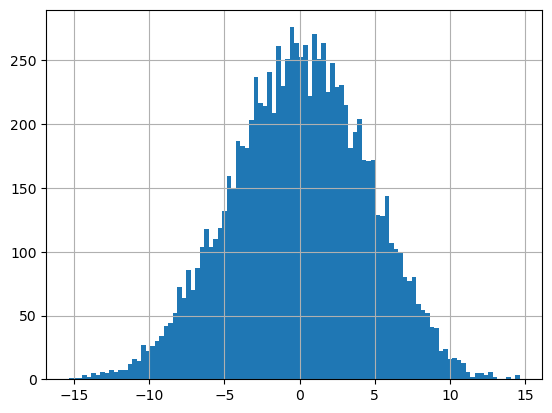

In [10]:
# todo: add a proper title

(y_pred-y).hist(bins=100)

#### Todo: 
Explain findings in the graphs above & what we can try next

In [11]:
# todo: explain the code below, what we do & why we do it? 

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6798900726201129

In [12]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6798900726201129

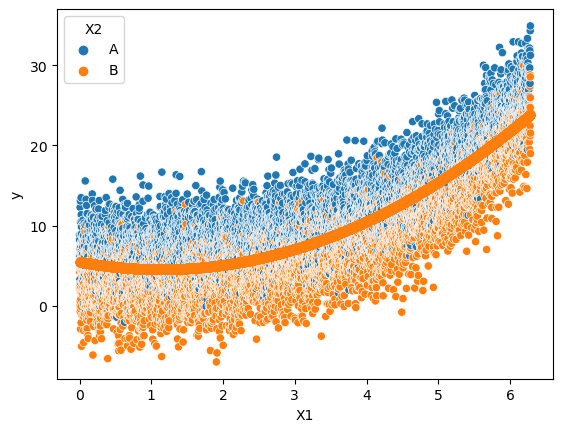

In [17]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

<Axes: >

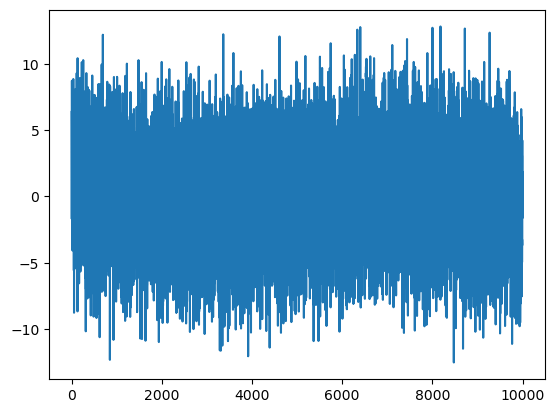

In [13]:
# todo: add a proper title

(y_pred-y).plot()

<Axes: >

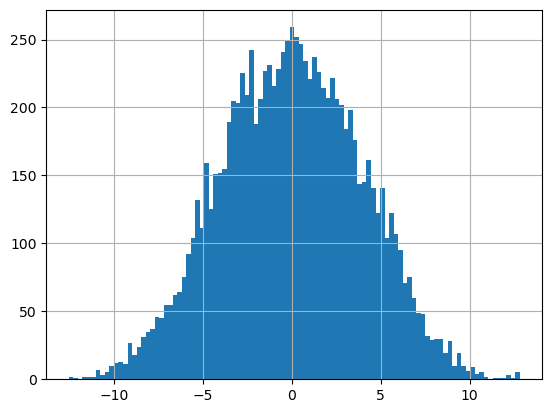

In [14]:
# todo: add a proper title

(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next? 

##  Finally:

In [20]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [15]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [16]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [17]:
encoded_df.head()

,X2_B
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [18]:
# todo: explain the code

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,1.0
1,0.000628,0.0
2,0.001257,0.0
3,0.001885,0.0
4,0.002514,1.0


In [19]:
# todo: explain the code

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8107577199835554

In [20]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8107577199835554

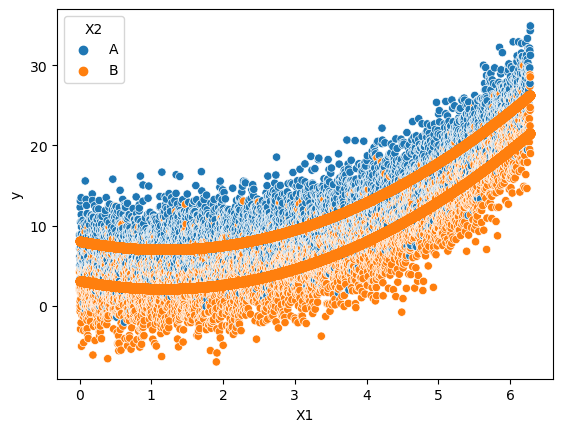

In [27]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

<Axes: >

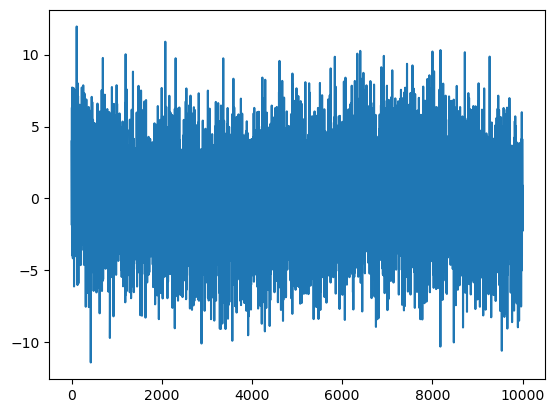

In [21]:
# todo: add a proper title

(y_pred-y).plot()

<Axes: >

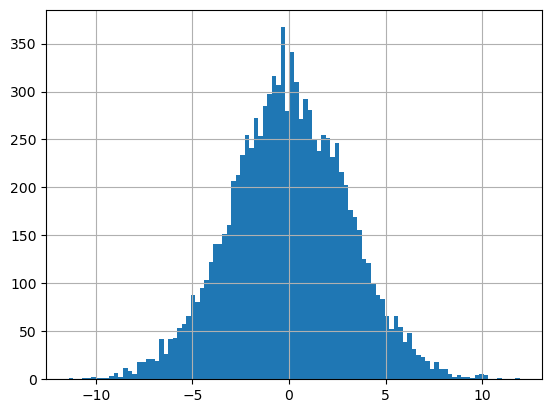

In [22]:
# todo: add a proper title

(y_pred-y).hist(bins=100)

#### Todo: 
explain results

## Create a train-test split

In [23]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [24]:
X_training.head()

,X1,X2
9820,6.170705,B
4952,3.111745,B
5251,3.299631,B
7454,4.683955,B
4491,2.822061,B


In [25]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
9820,6.170705,1.0
4952,3.111745,1.0
5251,3.299631,1.0
7454,4.683955,1.0
4491,2.822061,1.0


In [26]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.7031170976347088

## Create a pipeline

Add comments to `todo` parts

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [28]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [36]:
modeling_pipeline.score(X_test, y_test)

0.8129844742442158

## Evaluate/create residual plots

In [37]:
y_pred = modeling_pipeline.predict(X_test)

In [ ]:
# code

## Explain findings

Explain findings